In [1]:
import numpy as np
from glob import glob
import matplotlib.pyplot as plt
import gc
import xarray as xr
import pandas as pd
import xrft as xrft
import warnings
import scipy.signal as sig
import sys
import seaborn as sns
import gsw as gsw
sys.path.append("/homes/metogra/iufarias/FeedbackSubmeso/useful/")
import romspickle
# import seawater as sw

from dask.diagnostics import ProgressBar

warnings.filterwarnings("ignore")

In [3]:
plt.rcParams['text.usetex'] = True
plt.rcParams.update({'font.size': 20})

plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = ['Lucida Grande']

In [4]:
dxx2=0.5

In [5]:
dxx=2

In [6]:
path='/data/pacific/lrenault/SASI/CROCO/FULL/'
listm=glob(path+'surf*.nc');listm.sort()
# varf=xr.open_dataset(listm[-9:][xmon])
varf=xr.open_mfdataset(listm[1:],data_vars='minimal')

path='/data/pacific/lrenault/SASI/CROCO/SMTH/'
listt=glob(path+'surf*SASI_6h_his_20*_*.nc');listt.sort()
listt.append('/data/pacific/lrenault/SASI/CROCO/SMTH/surf_SASI_6h_his_2012-07.nc')
#vart=xr.open_dataset(listt[xmon])
vart=xr.open_mfdataset(listt[1:],data_vars='minimal')

In [7]:
chunks_new={'time_counter':40}

path='/data/pacific/lrenault/SASI/FULL/WRF/'
listmw=glob(path+'wrf_*.nc');listmw.sort()
# varf=xr.open_dataset(listm[-9:][xmon])
varfw=xr.open_mfdataset(listmw[::2][-7:],chunks=chunks_new)

path='/data/pacific/lrenault/SASI/SMTH/WRF/'
listtw=glob(path+'wrf_*.nc');listtw.sort()
#vart=xr.open_dataset(listt[xmon])
vartw=xr.open_mfdataset(listtw[::2][-7:],chunks=chunks_new)

In [8]:
sst_f=varfw.SST.compute()
sst_t=vartw.SST.compute()

In [9]:

tf=varf.temp#.groupby("time_counter.dayofyear").mean()
tf=tf.chunk(chunks=chunks_new);
tf=tf[:,120:-120,120:800].compute();

tt=vart.temp#.groupby("time_counter.dayofyear").mean()
tt=tt.chunk(chunks=chunks_new);
tt=tt[:,120:-120,120:800].compute();

In [10]:
nf=1
wdws='hann' #'flattop','hann'
wdw_cor=True
scl='density'



T_SMTH=xrft.isotropic_power_spectrum(sst_t[:,30:-30,30:-100].drop(['nav_lat', 'nav_lon']),
                                     dim=['y','x'],nfactor=nf,truncate='True',scaling=scl,detrend='linear',window=wdws,window_correction=wdw_cor).compute()

T_FULL=xrft.isotropic_power_spectrum(sst_f[:,30:-30,30:-100].drop(['nav_lat', 'nav_lon']),
                                     dim=['y','x'],nfactor=nf,truncate='True',scaling=scl,detrend='linear',window=wdws,window_correction=wdw_cor).compute()



In [11]:
nf=1
wdws='hann' #'flattop','hann'
wdw_cor=True
scl='density'



T_croco_SMTH=xrft.isotropic_power_spectrum(tt.drop(['nav_lat_rho', 'nav_lon_rho']),
                                     dim=['y_rho','x_rho'],nfactor=nf,truncate='True',scaling=scl,detrend='linear',window=wdws,window_correction=wdw_cor)

T_croco_FULL=xrft.isotropic_power_spectrum(tf.drop(['nav_lat_rho', 'nav_lon_rho']),
                                     dim=['y_rho','x_rho'],nfactor=nf,truncate='True',scaling=scl,detrend='linear',window=wdws,window_correction=wdw_cor)




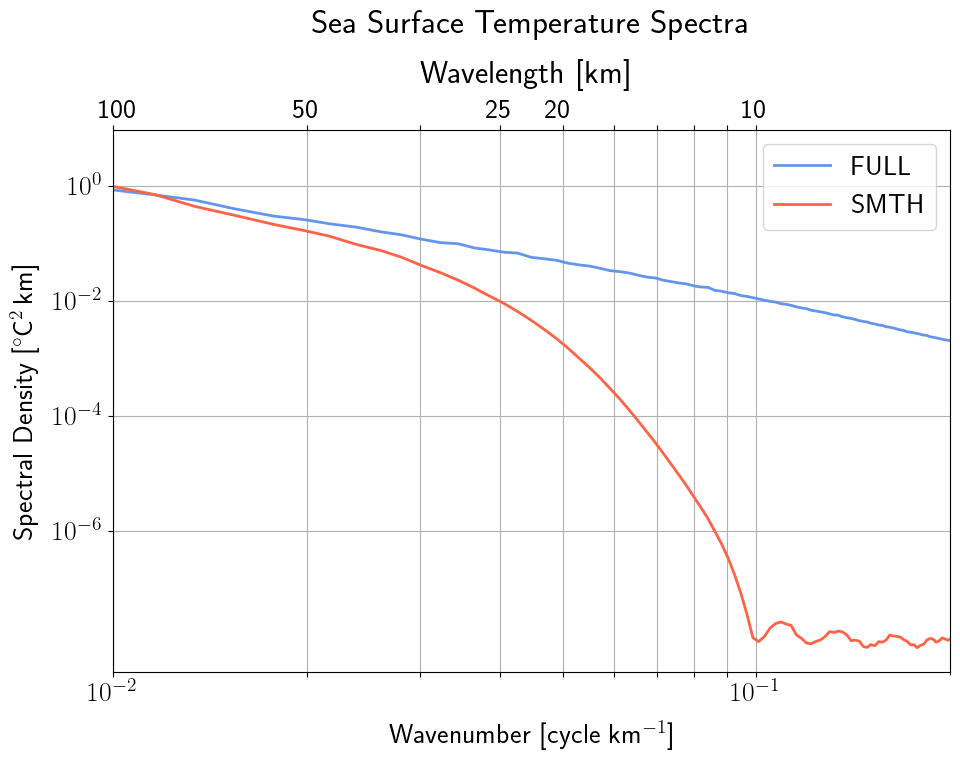

In [19]:



fig, ax = plt.subplots(figsize=(10,8))
# plt.figure(figsize=(20,8))

ax.plot(T_FULL.freq_r/dxx,T_FULL.mean(axis=0)*dxx,label='FULL',linewidth=2,color='cornflowerblue')
ax.plot(T_SMTH.freq_r/dxx,T_SMTH.mean(axis=0)*dxx,label='SMTH',linewidth=2,color='tomato')

# ax.plot(T_FULL.freq_r/dxx,T_FULL[0]/dxx*1e3,label='FULL',linewidth=2,color='cornflowerblue')
# ax.plot(T_SMTH.freq_r/dxx,T_SMTH[0]/dxx*1e3,label='SMTH',linewidth=2,color='tomato')


# plt.plot([1/25,1/25],[1,1e-8],'g--',label='25km')
# plt.plot([1/50,1/50],[1,1e-8],'y--',label='50km')
# plt.plot([1/65,1/65],[1,1e-8],'k--',label='65km')

plt.grid()
plt.ylabel(r'Spectral Density [$^{\circ}$C$^{2}\,$km]',fontweight='bold',labelpad=10)
# plt.xlabel('Wavenumber [cycle km$^{-1}$]',labelpad=10,)

ax.set_xscale('log')
ax.set_yscale('log')

# ax.set_yticks([1e-7,1e-6,1e-5,1e-4,0.5e-4,1e-3,0.5e-3,1e-2,0.5e-2,1e-1,0.5e-1]) 
ax.set_yticks([1e-6,1e-4,1e-2,1]) 
ax.set_xticks(np.arange(0.01,0.11,0.01))

# ax.set_xticks(np.arange(0.01,0.11,0.02),labels=np.int_(1/np.arange(0.01,0.11,0.02))) 


# ax.set_xticklabels((1/np.arange(0.01,0.11,0.01)), minor=True )
ax.tick_params(right=False, top=True, labelright=False, labeltop=False, labelrotation=0)
# ax.tick_params( axis='x', which='minor', top=True )
# ax.tick_params( axis='x', which='major', top=True )

# new_ax=ax.twinx()


# new_ax.set_xticks(np.arange(0.01,0.11,0.01))
# new_ax.set_xticklabels(np.int_(1/np.arange(0.01,0.11,0.01)))


# ax_second_label = ax.twiny() # New second x axis that shares the same y-axis
# ax_second_label.set_xlim(left=min(ticks_positions_array), right=max(ticks_positions_array)) # Fix the length of the axis to match the season one.
# ax_second_label.set_xticks(

# tick_params(labelbottom=True,labeltop=True)
plt.xlabel('Wavenumber [cycle km$^{-1}$]',labelpad=10)

ax.set_title('Sea Surface Temperature Spectra',pad=70)
ax.text(0.03,60,'Wavelength [km]',fontsize=23)
ax.text(0.01-0.0005,15,r'100',fontsize=20)
ax.text(0.02-0.001,15,r'50',fontsize=20)
ax.text(0.04-0.002,15,r'25',fontsize=20)
ax.text(0.05-0.003,15,r'20',fontsize=20)
ax.text(0.1-0.005,15,r'10',fontsize=20)



ax.legend()

ax.set_xlim(1e-2,0.2)



plt.tight_layout()


plt.savefig('/homes/metogra/iufarias/Documents/figures/poster/SST_spec_comparison_fullwavenumber.png',dpi=300,bbox_inches='tight')

